In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Central Limit Theorem ##

In [2]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


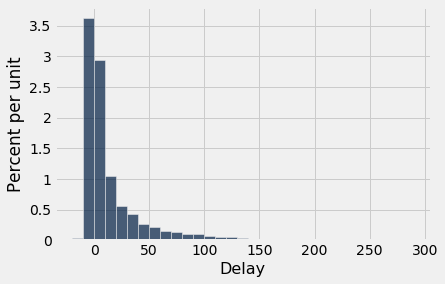

In [3]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [4]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [5]:
percentile(50, delays)

2

In [6]:
sample_size = 400

means_400 = make_array()

for i in np.arange(10000):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means_400 = np.append(means_400, sample_mean)

Population Average:  16.658155515370705


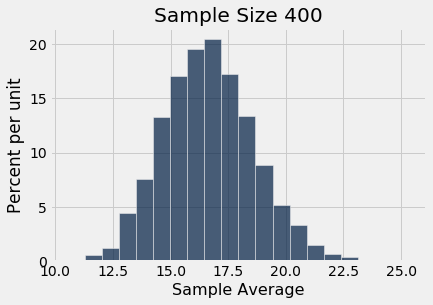

In [7]:
Table().with_columns('Sample Mean', means_400).hist(bins = 20)

plots.title('Sample Size ' + str(sample_size))
plots.xlabel('Sample Average')
print('Population Average: ', mean_delay);

In [8]:
np.average(means_400)

16.657268999999996

## Variability of the Sample Average ##

In [9]:
sample_size = 900

means_900 = make_array()

for i in np.arange(10000):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means_900 = np.append(means_900, sample_mean)

In [10]:
means_tbl = Table().with_column(
    '400', means_400,
    '900', means_900
)

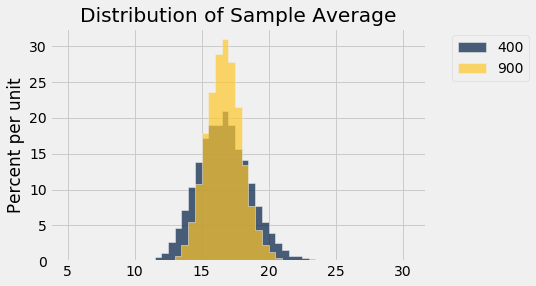

In [11]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

In [12]:
united.num_rows

13825

In [13]:
"""Empirical distribution of random sample means"""

def sample_means(sample_size):
    
    repetitions = 10000
    means = make_array()

    for i in range(repetitions):
        sampled_flights = united.sample(sample_size)
        sample_mean = np.mean(sampled_flights.column('Delay'))
        means = np.append(means, sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.617030999999997
Population SD: 39.480199851609314
SD of sample means: 3.9247155228167814


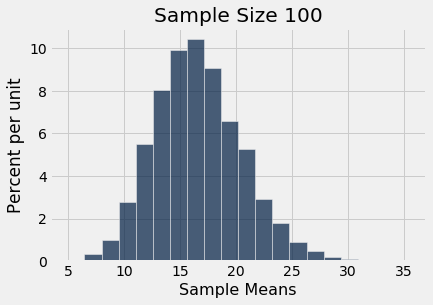

In [14]:
sample_means(100)

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.654234
Population SD: 39.480199851609314
SD of sample means: 1.9810815794646117


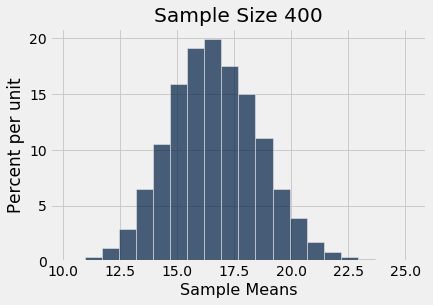

In [15]:
sample_means(400)

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.67828176
Population SD: 39.480199851609314
SD of sample means: 1.5734376228078768


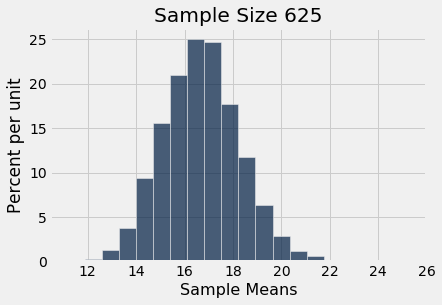

In [16]:
sample_means(625)

In [17]:
sd_delay, sd_delay / make_array(10, 20, 25)

(39.480199851609314, array([3.94801999, 1.97400999, 1.57920799]))

In [18]:
sample_sizes = np.arange(50, 401, 50)

sd_of_sample_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(10000):
        means = np.append(means, np.mean(united.sample(n).column('Delay')))
    sd_of_sample_means = np.append(sd_of_sample_means, np.std(means))

In [19]:
sd_comparison = Table().with_column(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_of_sample_means,
    'Population_SD/sqrt(n)', sd_delay/np.sqrt(sample_sizes)
)

In [20]:
sd_comparison

Sample Size n,"SD of 10,000 Sample Means",Population_SD/sqrt(n)
50,5.57979,5.58334
100,3.93257,3.94802
150,3.24126,3.22354
200,2.79042,2.79167
250,2.49871,2.49695
300,2.26732,2.27939
350,2.12152,2.11031
400,1.96666,1.97401


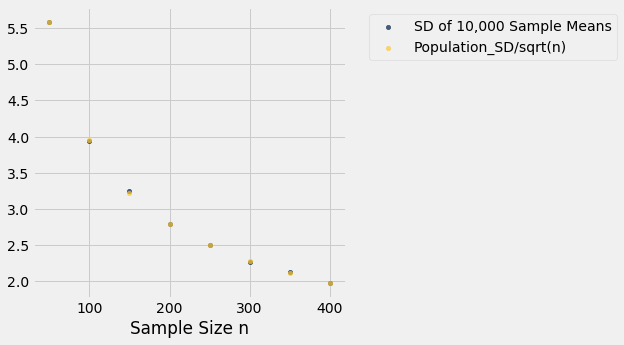

In [21]:
sd_comparison.scatter('Sample Size n')